In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

from MLtools import variable_sep_data, true_false_clf_plotter, accuracy_clf, label_plotter_2d
from KNN import knn

# Classification

### Test on 2D Feature Space Classifiaction

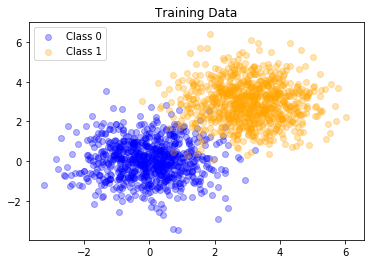

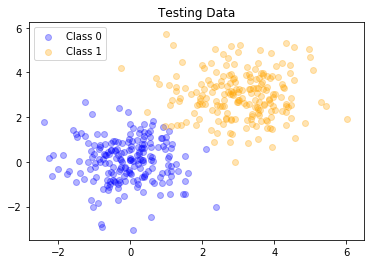

In [2]:
X, y = variable_sep_data(1000, 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

label_plotter_2d(X_train, y_train)
plt.title('Training Data')
plt.legend()
plt.show()

label_plotter_2d(X_test, y_test)
plt.title('Testing Data')
plt.legend()
plt.show()

In [6]:
mdl = knn.knn()
mdl.fit(X_train, y_train)
y_pred = mdl.predict_clf(X_test)
acc = accuracy_clf(y_pred, y_test)
print(F'Model accuracy = {acc}')

Model accuracy = 0.9775


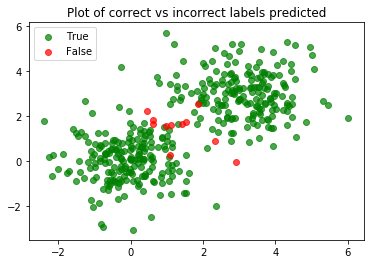

In [8]:
true_false_clf_plotter(X_test, y_pred, y_test)
plt.title('Plot of correct vs incorrect labels predicted')
plt.legend()
plt.show()

### Test on Breast Cancer Feature Space

In [11]:
df = pd.read_csv('datasets/Breast_Cancer_Data.csv')  # load and drop id label
df = df.drop(['id'], axis='columns')

X = np.array(df[[i for i in df.columns if i != 'diagnosis']])  # split to X and y numpy arrays
y = np.array(df['diagnosis'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [9]:
mdl = knn.knn(k=7)
mdl.fit(X_train, y_train)
y_pred = mdl.predict_clf(X_test)
acc = accuracy_clf(y_pred, y_test)
print(F'Model accuracy = {acc}')

Model accuracy = 0.9875


# Regression

### Test on Auto-mpg Feature Space

In [10]:
df = pd.read_csv('datasets/auto-mpg.csv')
df = df.drop(['car name'], axis='columns')

X = np.array(df[[i for i in df.columns if i != 'mpg']], 'float64')  # split to X and y numpy arrays
y = np.array(df['mpg'], 'float64')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
mdl = knn.knn(k=7)
mdl.fit(X_train, y_train)
y_pred = mdl.predict_reg(X_test)

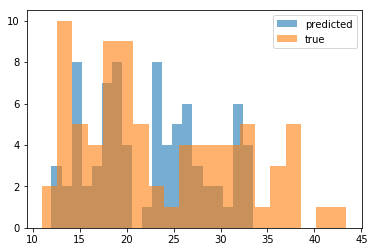

In [13]:
plt.hist(y_pred, bins=20, alpha=0.6, label='predicted')
plt.hist(y_test, bins=20, alpha=0.6, label='true')
plt.legend()
plt.show()

In [14]:
percentage_errors = (abs(y_pred - y_test) / np.max(y)).mean()
print(F'Average percentage error is {percentage_errors:.3f}')

Average percentage error is 0.073


___